# Exercice 1: Health Expectancy

1. Spending_USD et Life_Expectancy semblent être corrélées.

- Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?

- Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?



2. Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.

- Peut-on tester cela avec l'une des techniques vues dans les précédentes vidéos ?




3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). (Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = sns.load_dataset("healthexp")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


### 1. Spending_USD et Life_Expectancy semblent être corrélées.

- Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?

- Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?

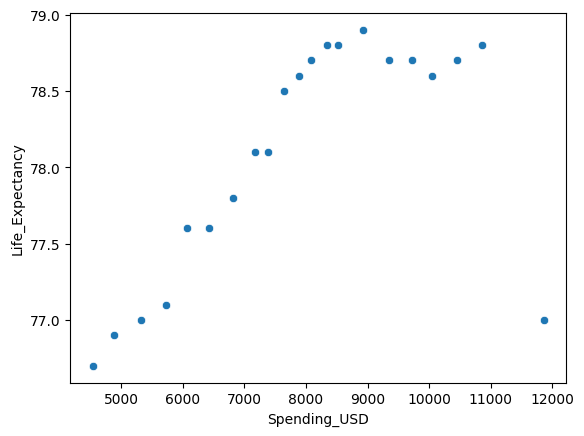

In [3]:
temp_df = df.query("Country == 'USA' and Year >= 2000 and Year <= 2020")
sns.scatterplot(data=temp_df, x="Spending_USD", y="Life_Expectancy")
plt.show()

In [14]:
from scipy.stats import pearsonr

result = pearsonr(temp_df["Spending_USD"], temp_df["Life_Expectancy"])
print(result)
print(f"La correlation de Pearson entre Spending_USD et Life_Expectancy aux USA entre 2000 et 2020 est de {result.correlation}")
print(f"La probabilité d'obtenir une corrélation aussi importante si les 2 variables n'étaient pas corrélées est de {result.pvalue * 100}%")
print(f"Il y a 1 chance sur {1 / result.pvalue} d'obtenir ces résultats si les variables n'étaient pas corrélées")

PearsonRResult(statistic=np.float64(0.6210674528998252), pvalue=np.float64(0.0026581544805799064))
La correlation de Pearson entre Spending_USD et Life_Expectancy aux USA entre 2000 et 2020 est de 0.6210674528998252
La probabilité d'obtenir une corrélation aussi importante si les 2 variables n'étaient pas corrélées est de 0.2658154480579906%
Il y a 1 chance sur 376.2008593954399 d'obtenir ces résultats si les variables n'étaient pas corrélées


In [ ]:
print("H0 : Il n'y a pas de corrélation entre les dépenses en santé et la durée de vie aux Etats Unis entre 2000 et 2020")
print()

alpha = 0.02
p_value = pearsonr(temp_df["Spending_USD"], temp_df["Life_Expectancy"]).pvalue
print(f"pvalue : {p_value}")
if p_value < alpha:
	print("Nous avons suffisamment d'évidences pour rejeter H0")
else:
	print("Nous avons pas suffisamment d'évidences pour rejeter H0")

H0 : Il n'ya pas de corrélation entre les dépenses en santé et la durée de vie aux Etats Unis entre 2000 et 2020

pvalue : 0.0026581544805799064
Nous avons suffisamment d'évidences pour rejeter H0


### 2. Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.

- Peut-on tester cela avec l'une des techniques vues dans les précédentes vidéos ?

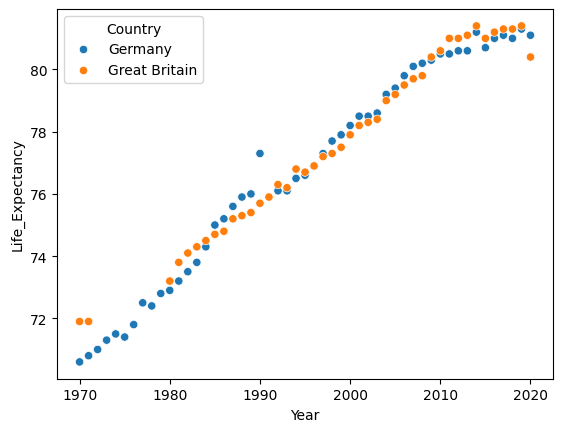

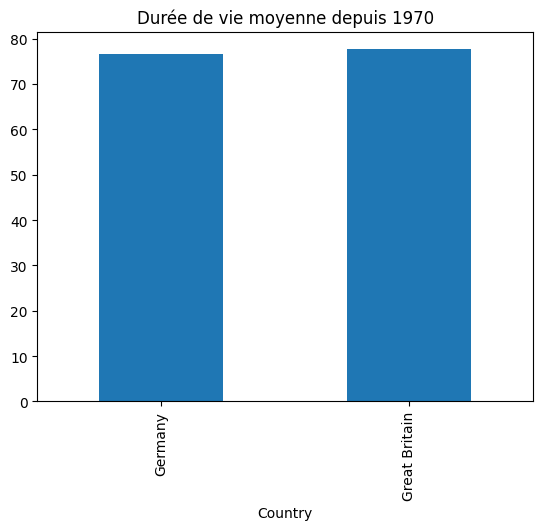

In [15]:
temp_df = df.query("Country == 'Great Britain' or Country == 'Germany'")
sns.scatterplot(data=temp_df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()
temp_df.groupby('Country')["Life_Expectancy"].mean().plot(kind="bar").set_title("Durée de vie moyenne depuis 1970")
plt.show()

In [16]:
from scipy.stats import ttest_ind

print("H0 : L'allemagne et la grande bretagne ont en moyenne la même durée de vie depuis 1970")
print()

germanGroup = df.query("Country == 'Germany'")["Life_Expectancy"]
greatBritainGroup = df.query("Country == 'Great Britain'")["Life_Expectancy"]
alpha = 0.02
p_value = ttest_ind(germanGroup, greatBritainGroup).pvalue
print(f"pvalue : {p_value}")
if p_value < alpha:
	print("Nous avons suffisamment d'évidences pour rejeter H0")
else:
	print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")

# CORRECTION
# Nous ne pouvons pas répondre à cette question par le test de Student car celui-ci implique une indépendance entre les différentes observations ce qui n'est pas respecté ici 
# (la moyenne d'age d'une année sur l'autre n'a pas de raison de varié du tout au tout)


H0 : L'allemagne et la grande bretagne ont en moyenne la même durée de vie depuis 1970

pvalue : 0.1809765508420157
Nous n'avons pas suffisamment d'évidences pour rejeter H0


### 3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). 
(Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

In [36]:
from scipy.stats import ttest_1samp
df_usa = df.query("Country == 'USA'")

print("H0 : Depuis 1970, la durée de vie aux USA augmente en moyenne de 0.3an /an")
print()

df_diff = df_usa["Life_Expectancy"].diff().dropna()
df_diff.head()

# On utilise un test de Student à 1 échantillon
result = ttest_1samp(df_diff, 0.3)
print(f"result : {result}")
p_value = result.pvalue
if p_value < alpha:
	print("Nous avons suffisamment d'évidences pour rejeter H0")
else:
	print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")

H0 : Depuis 1970, la durée de vie aux USA augmente en moyenne de 0.3an /an

result : TtestResult(statistic=np.float64(-3.7212105613188773), pvalue=np.float64(0.0005112013249193949), df=np.int64(49))
Nous avons suffisamment d'évidences pour rejeter H0
